In [22]:
# Import the modules
import cv2
import numpy as np


%matplotlib auto
#%pylab inline

import matplotlib.pyplot as plt
import numpy as np

def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")
#import sys
#print('\n'.join(sys.path))
#pip list

Using matplotlib backend: TkAgg


../data/Lena.png
  Shape: (512, 512, 3)   Data type: uint8
[ [ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] [132 114 188] ]
[ [130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] [137 147 202] ]  Lena: uint8
image_copy = np.copy(image)
  Shape: (512, 512, 3)   Data type: uint8
[ [ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] [132 114 188] ]
[ [130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] [137 147 202] ]  image_copy: uint8
Populating the interactive namespace from numpy and matplotlib


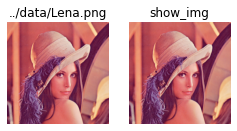

In [23]:
# Open an image and make a copy of it
image = cv2.imread('../data/Lena.png', cv2.IMREAD_COLOR)
image_copy = np.copy(image)

###################################################################
print_image('../data/Lena.png','Lena',image,44,46,221,229)
print_image('image_copy = np.copy(image)','image_copy',image,44,46,221,229)
%pylab inline
plt.figure(figsize=(4,3))
plt_view_image(plt,[["../data/Lena.png",image[:,:,[2,1,0]] ],["show_img",image[:,:,[2,1,0]]   ]])

cv2.imshow('image, image_copy', np.hstack([image, image_copy]))
cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
# Define some constants
mouse_pressed = False
y = x = w = h = 0

# Define the mouse callback function to draw a rectangle on the image
def mouse_callback(event, _x, _y, flags, param):
    global image_copy, x, y, w, h, mouse_pressed

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        x, y = _x, _y
        image_copy = np.copy(image)

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            image_copy = np.copy(image)
            cv2.rectangle(image_copy, (x, y), (_x, _y), (0, 255, 0), 3)

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        w, h = _x - x, _y - y
        
# Display the image
cv2.namedWindow('image select area. Press "a" when done')
cv2.setMouseCallback('image select area. Press "a" when done', mouse_callback)

# after the rectangle has been completed 
# and the A button on the keyboard has been pressed, 
# We'll close the window 
while True:
    cv2.imshow('image select area. Press "a" when done', image_copy)
    k = cv2.waitKey(1)

    if k == ord('a') and not mouse_pressed:
        if w*h > 0:
            break

cv2.destroyAllWindows()

print("w ==",w, "h ==", h)

w == 377 h == 479


# Алгоритм сегментации GrabCut

[Обзор алгоритмов сегментации](https://habr.com/en/company/intel/blog/266347/)

Это интерактивный алгоритм выделения объекта, разрабатывался как более удобная альтернатива магнитному лассо (чтобы выделить объект, пользователю требовалось обвести его контур с помощью мыши). Для работы алгоритма достаточно заключить объект вместе с частью фона в прямоугольник (grab). Сегментирование объекта произойдет автоматически (cut).

Могут возникнуть сложности при сегментации, если внутри ограничивающего прямоугольника присутствуют цвета, которые встречаются в большом количестве не только в объекте, но и на фоне. В этом случае можно поставить дополнительные метки объекта (красная линия) и фона (синяя линия).

# [Режем котиков. Или реализация GrabCut в OpenCV](https://delirium-00.livejournal.com/6148.html)
Алгоритм GrabCut был разработан Владимиром Колмогоровым, Карстеном Ротером и Эндрю Блэйком и предназначен для выделения объекта из фона с минимальным участием человека. Этот алгоритм, в свою очередь, основывается на алгоритме к-средних для обучения модели цветов(цвет фона и объекта моделируется смесью гауссиан (обычно 5-8 компонент) и легендарном алгоритме GraphCuts для сегментации.



labels
  Shape: (512, 512)   Data type: uint8
[ 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ]
[ 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ]  labels: uint8
../data/Lena.png
  Shape: (512, 512, 3)   Data type: uint8
[ [ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] [132 114 188] ]
[ [130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] [137 147 202] ]  Lena: uint8
image_grabCut = np.copy(image)
  Shape: (512, 512, 3)   Data type: uint8
[ [32 29 65] [36 32 64] [138 121 198] [134 118 196] [35 33 64] [35 33 64] [132 117 188] [132 114 188] ]
[ [43 40 64] [167 157 200] [158 165 207] [122 133 

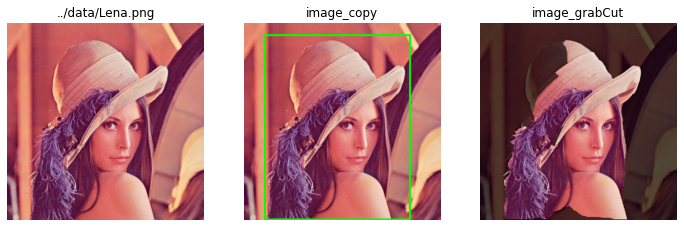

In [25]:
labels = np.zeros(image.shape[:2],np.uint8)

# cv2.grabCut() to create an object mask based on the rectangle
#Interactive Foreground Extraction using GrabCut Algorithm
#cv.grabCut (image, mask, rect, bgdModel, fgdModel, iterCount, mode = cv.GC_EVAL)
#  image - input 8-bit 3-channel image.
#  mask - It is a mask image where we specify which areas are background, foreground or probable background/foreground etc. 
#         It is done by the following flags, cv.GC_BGD, cv.GC_FGD, cv.GC_PR_BGD, cv.GC_PR_FGD, or simply pass 0,1,2,3 to image.
#         input/output 8-bit single-channel mask. The mask is initialized by the function when mode is set to 
#         GC_INIT_WITH_RECT. Its elements may have one of the cv.rabCutClasses.
# rect - ROI containing a segmented object. The pixels outside of the ROI are marked as "obvious background". The parameter is only 
#        used when mode==GC_INIT_WITH_RECT. It is the coordinates of a rectangle which 
#        includes the foreground object in the format (x,y,w,h)
# bgdModel - temporary array for the background model. Do not modify it while you are processing the same image.
#            These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).
# fgdModel - temporary arrays for the foreground model. Do not modify it while you are processing the same image.
#            These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).
# iterCount - number of iterations the algorithm should make before returning the result. Note that the result can be 
#             refined with further calls with mode==GC_INIT_WITH_MASK or mode==GC_EVAL .
# mode - operation mode that could be one of the cv::GrabCutModes. It should be cv.GC_INIT_WITH_RECT or cv.GC_INIT_WITH_MASK or 
#        combined which decides whether we are drawing rectangle or final touchup strokes.

labels, bgdModel, fgdModel = cv2.grabCut(image, labels, (x, y, w, h), 
                                         None, None, 5, 
                                         cv2.GC_INIT_WITH_RECT)
image_grabCut = np.copy(image)

# Give background region a darker shade
image_grabCut[(labels == cv2.GC_PR_BGD)|(labels == cv2.GC_BGD)] //= 3

###################################################
print_image('labels','labels',labels,44,46,180,280)
print_image('../data/Lena.png','Lena',image,44,46,221,229)
print_image('image_grabCut = np.copy(image)','image_grabCut',image_grabCut,44,46,221,229)
plt.figure(figsize=(12,6))
plt_view_image(plt,[["../data/Lena.png",image[:,:,[2,1,0]] ],["image_copy",image_copy[:,:,[2,1,0]]],["image_grabCut",image_grabCut[:,:,[2,1,0]]]])

cv2.imshow('image, image_copy, image_grabCut', np.hstack([image, image_copy, image_grabCut]))
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
# Define the mouse callback to draw the mask on the image
# It's necessary to repair mistakes in the previous cv2.grabCut call

label = cv2.GC_FGD
lbl_clrs = {cv2.GC_BGD: (0,0,0), cv2.GC_FGD: (255,255,255)}

def mouse_callback(event, x, y, flags, param):
    global mouse_pressed

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        cv2.circle(labels, (x, y), 5, label, cv2.FILLED)
        cv2.circle(image_grabCut, (x, y), 5, lbl_clrs[label], cv2.FILLED)

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            cv2.circle(labels, (x, y), 5, label, cv2.FILLED)
            cv2.circle(image_grabCut, (x, y), 5, lbl_clrs[label], cv2.FILLED)

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        
cv2.namedWindow('fix skiped area. Press \n"a" == Exit\n"l" == Label background')
cv2.setMouseCallback('fix skiped area. Press \n"a" == Exit\n"l" == Label background', mouse_callback)

while True:
    cv2.imshow('fix skiped area. Press \n"a" == Exit\n"l" == Label background', image_grabCut)
    k = cv2.waitKey(1)

    if k == ord('a') and not mouse_pressed:
        break
    elif k == ord('l'):
        label = cv2.GC_FGD - label

cv2.destroyAllWindows()

labels
  Shape: (512, 512)   Data type: uint8
[ 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ]
[ 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ]
[ 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ]
[ 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ]  labels: uint8
../data/Lena.png
  Shape: (512, 512, 3)   Data type: uint8
[ [ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 1

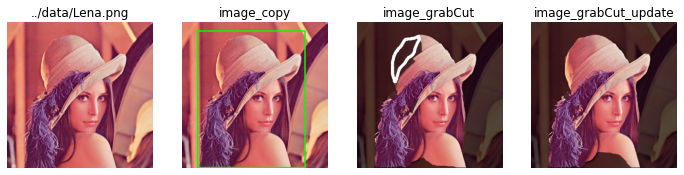

In [31]:
# Then, call cv2.grabCut again to get the fixed mask. 
labels, bgdModel, fgdModel = cv2.grabCut(image, labels, 
                                         None, bgdModel, fgdModel, 
                                         5, cv2.GC_INIT_WITH_MASK)


# Finally, update the mask on the image, and show it
image_grabCut_update = np.copy(image)
image_grabCut_update[(labels == cv2.GC_PR_BGD)|(labels == cv2.GC_BGD)] //= 3


####################################################
print_image('labels','labels',labels,44,48,180,280)
print_image('../data/Lena.png','Lena',image,44,46,221,229)
print_image('image_grabCut = np.copy(img)','image_grabCut',image_grabCut,44,48,221,229)
print_image('image_grabCut_update[(labels == cv2.GC_PR_BGD)|(labels == cv2.GC_BGD)] //= 3','image_grabCut_update',image_grabCut_update,44,48,221,230)
plt.figure(figsize=(12,6))
plt_view_image(plt,[["../data/Lena.png",image[:,:,[2,1,0]] ],["image_copy",image_copy[:,:,[2,1,0]]],
                    ["image_grabCut",image_grabCut[:,:,[2,1,0]]],["image_grabCut_update",image_grabCut_update[:,:,[2,1,0]]] ])

cv2.imshow('img, img_grabCut', np.hstack([image_copy, image_grabCut,image_grabCut_update]))
cv2.waitKey()
cv2.destroyAllWindows()